<a href="https://colab.research.google.com/github/Jeet2561/13sep_Jeet/blob/main/Car_price_prediction_ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

Data collection and processing

In [ ]:
car_dataset = pd.read_csv('/content/car data.csv')

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.shape

(301, 9)

In [ ]:
car_dataset.isnull().sum() # to check how many columns have null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# get the info of the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# checking the distribution of the categorial data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the categorial data

In [ ]:
# Encoding "Fuel_type" column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# Encoding "Seller_type" column
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)

# Encoding "Transmission" column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)


car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
print(car_dataset.Car_Name.value_counts())

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64


Splitting the data and target

In [ ]:
# 1st step is to split the data as per requirement
x = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y = car_dataset['Selling_Price']

In [ ]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


splitting the training and test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1,random_state=2)

In [ ]:
print(x.shape ,x_train.shape, x_test.shape) # 90% traing data and 10% test data

(301, 7) (270, 7) (31, 7)


In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(301,) (270,) (31,)


Linear Regresssion model - model training

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(x_train,y_train)  # model gets trained using ".fit" function

LinearRegression()

Model Evaluation -- Prediction on training data

In [ ]:
training_data_prediction = lin_reg_model.predict(x_train) # model can be predicted using ".predict" function

In [ ]:
# R squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8799451660493711


visualize the actual prices and predicted prices

<function matplotlib.pyplot.show(close=None, block=None)>

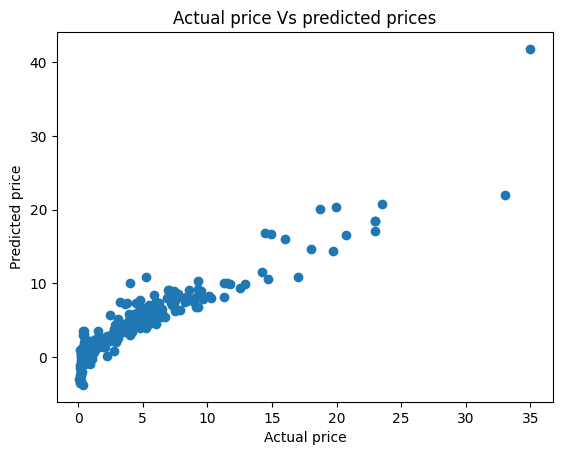

In [ ]:
plt.scatter(y_train, training_data_prediction) # this creates a scattered graph
plt.xlabel("Actual price")  # X axis contains the actual prices of the car
plt.ylabel("Predicted price") # Y axis contains the predicted prices of the car
plt.title("Actual price Vs predicted prices")
plt.show

In [ ]:
# prediction on test data
test_data_prediction = lin_reg_model.predict(x_test)

In [ ]:
Error_score2 = metrics.r2_score(y_test, test_data_prediction)
print("R squared error 'test data' :" , Error_score2)

R squared error 'test data' : 0.8365766715027051


<function matplotlib.pyplot.show(close=None, block=None)>

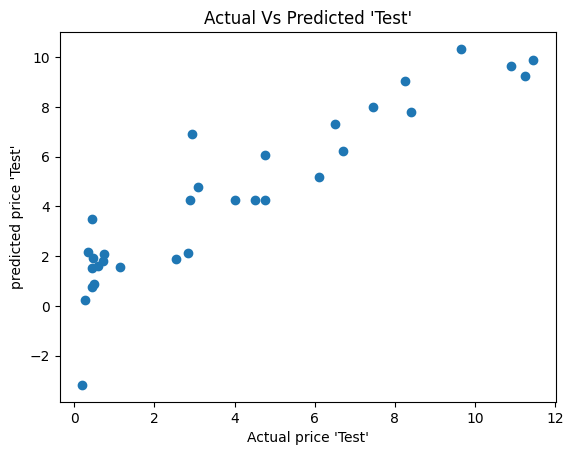

In [ ]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual price 'Test'")
plt.ylabel("predicted price 'Test'")
plt.title("Actual Vs Predicted 'Test'")
plt.show

Lasso regression -- Model evaluation

In [ ]:
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(x_train,y_train)  # model gets trained using ".fit" function

Lasso()

Model Evaluation -- Prediction on training data

In [ ]:
training_data_prediction = lass_reg_model.predict(x_train) # model can be predicted using ".predict" function

In [ ]:
# R squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8427856123435794


visualize the actual prices and predicted prices

<function matplotlib.pyplot.show(close=None, block=None)>

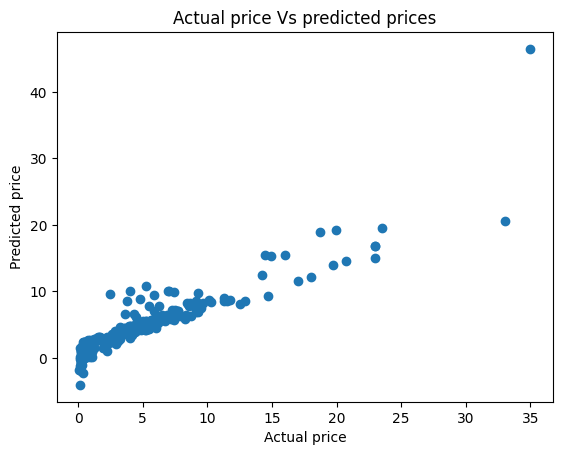

In [ ]:
plt.scatter(y_train, training_data_prediction) # this creates a scattered graph
plt.xlabel("Actual price")  # X axis contains the actual prices of the car
plt.ylabel("Predicted price") # Y axis contains the predicted prices of the car
plt.title("Actual price Vs predicted prices")
plt.show

In [ ]:
# prediction on test data
test_data_prediction = lass_reg_model.predict(x_test)

In [ ]:
Error_score2 = metrics.r2_score(y_test, test_data_prediction)
print("R squared error 'test data' :" , Error_score2)

R squared error 'test data' : 0.8709167941173195


<function matplotlib.pyplot.show(close=None, block=None)>

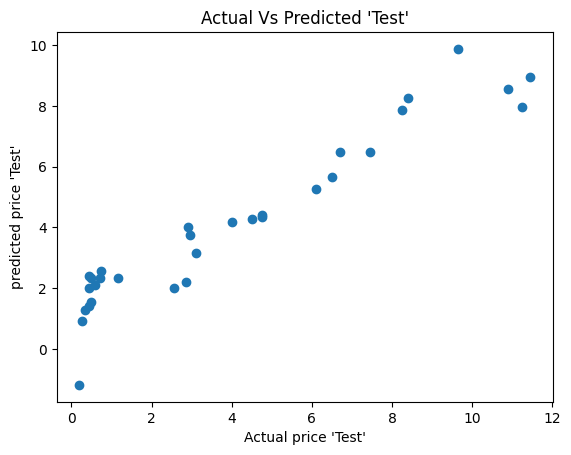

In [ ]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual price 'Test'")
plt.ylabel("predicted price 'Test'")
plt.title("Actual Vs Predicted 'Test'")
plt.show